In [1]:
!pip install seaborn
!pip install lightgbm

In [2]:

import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt 
import seaborn as sns
import lightgbm


from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error, r2_score 
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.model_selection import learning_curve, validation_curve


%matplotlib inline 

In [3]:
df = pd.read_csv('heart.csv', sep=",")
import warnings
warnings.filterwarnings("ignore")

# Data Set Information:

This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

## Attribute Information:
> 1. age
> 2. sex
> 3. chest pain type (4 values)
> 4. resting blood pressure
> 5. serum cholestoral in mg/dl
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved
> 9. exercise induced angina
> 10. oldpeak = ST depression induced by exercise relative to rest
> 11. the slope of the peak exercise ST segment
> 12. number of major vessels (0-3) colored by flourosopy
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [4]:
df.shape

(303, 14)

In [5]:

df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Проверяем, есть ли строки с пропущенными значениями:

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

пропущенных значений нет.

Исследуем распределение данных:

In [8]:
df['target'].unique()

array([1, 0])

бинарное значение выходного 

Все переменные - численные, поэтому нет смысла исследовать уникальные значения

In [9]:
#sns.pairplot(df, hue= "target")

Корреляция Спирмена

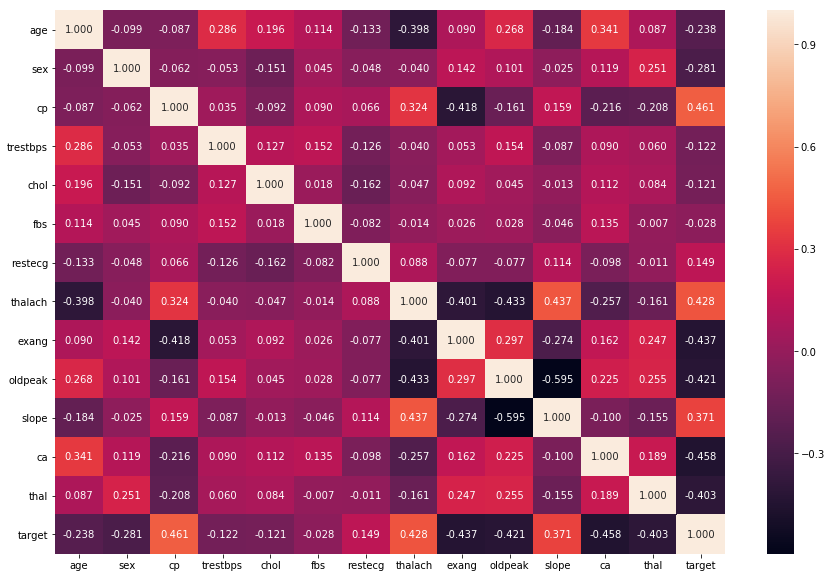

In [10]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(method='spearman'),annot=True, fmt='.3f')

Оставляем важные параметры

In [11]:
#lgbm_regressor = lightgbm.LGBMRegressor().fit(df.loc[:, df.columns != 'target'], df['target'])

#list_of_importances = list(zip(df.loc[:, df.columns != 'target'].columns.tolist(), 
                               #lgbm_regressor.feature_importances_))

#sorted(list_of_importances, key= lambda x: x[1], reverse= True)

In [12]:
##important_features = [x[0] for x in sorted(list_of_importances, key= lambda x: x[1], reverse= True)[:7]]

## Разделяем на об. и тестувую выборки

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, df.columns != 'target'], 
                                                    df['target'], 
                                                    test_size= 0.2, 
                                                    random_state= 42)

In [45]:
from sklearn.ensemble import RandomForestClassifier

# Модель на основе случайного дерева

In [46]:
clas = RandomForestClassifier().fit(X_train, y_train)

In [47]:
print(accuracy_score(clas.predict(X_test), y_test))
print(f1_score(clas.predict(X_test), y_test, average='macro'))
print(precision_score(clas.predict(X_test), y_test, average='macro'))

0.819672131147541
0.8196721311475409
0.8216594827586207


In [49]:
from sklearn.ensemble import GradientBoostingClassifier

# Модель на основе градиентного бустинга

In [50]:
clas=GradientBoostingClassifier(random_state=1)
clas.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=1,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [51]:
print(accuracy_score(clas.predict(X_test), y_test))
print(f1_score(clas.predict(X_test), y_test, average='macro'))
print(precision_score(clas.predict(X_test), y_test, average='macro'))

0.7704918032786885
0.7704301075268818
0.771551724137931


In [23]:
from sklearn.model_selection import GridSearchCV

# Кросс-валидация моделей по параметру n_estimators

In [52]:
clas =  RandomForestClassifier()
param = {'n_estimators':range(10,300,10)}
GV = GridSearchCV(clas, param, cv=3)
GV.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(10, 300, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [53]:
GV.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=160, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [54]:
print(accuracy_score(GV.predict(X_test), y_test))

0.8524590163934426


In [62]:
clas = GradientBoostingClassifier()
param = {'n_estimators':range(10,500,10)}
GV = GridSearchCV(clas, param, cv=3)
GV.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': range(10, 500, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [63]:
GV.best_estimator_

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [64]:
print(accuracy_score(GV.predict(X_test), y_test))

0.8360655737704918
